#### Attribute Information:

1) Area (A): La surface d'une zone de haricot et le nombre de pixels à l'intérieur de ses limites.
2) Perimeter (P):  la circonférence d'un haricot est définie comme la longueur de sa bordure.
3) Major axis length (L): La distance entre les extrémités de la ligne la plus longue qui peut être tracée à partir d'un haricot.
4) Minor axis length (l): La ligne la plus longue qui peut être tracée à partir d'une fève tout en étant perpendiculaire à l'axe principal.
5) Aspect ratio (K):  Définit la relation entre L et l.
6) Eccentricity (Ec): Excentricité de l'ellipse ayant les mêmes moments que la région.
7) Convex area (C): nombre de pixels dans le plus petit polygone convexe pouvant contenir la surface d'une graine de haricot.
8) Equivalent diameter (Ed): Le diamètre d'un cercle ayant la même surface qu'une graine de haricot.
9) Extent (Ex):  le rapport entre les pixels de la boîte englobante et la surface du haricot.
10) Solidity (S): Également appelée convexité. Il s'agit du rapport entre les pixels de la coquille convexe et ceux qui se trouvent dans les haricots.
11) Roundness (R): calculée à l'aide de la formule suivant: (4piA)/(P^2)
12) Compactness (CO): Mesure la rondeur d'un objet: Ed/L
13) ShapeFactor1 (SF1)
14) ShapeFactor2 (SF2)
15) ShapeFactor3 (SF3)
16) ShapeFactor4 (SF4)
17) Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

In [1]:
import pandas as pd
import os
import numpy as np
import plotly.express as px  # dataviz
import matplotlib.pyplot as plt # dataviz
import scipy.stats as stats
import statsmodels.api
import seaborn as sns

# Standardisation
from sklearn.preprocessing import StandardScaler

# Winsorization
from scipy.stats.mstats import winsorize

# Splitter le dataset
from sklearn.model_selection import train_test_split

# Modélisation = Classification
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier , LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Métriques
from sklearn.metrics import  ConfusionMatrixDisplay, confusion_matrix , accuracy_score, recall_score, f1_score, roc_auc_score, precision_score,mean_squared_error

# Evaluation
from sklearn.model_selection import cross_val_score ,learning_curve ,GridSearchCV,RandomizedSearchCV

#Interpretability
from sklearn.inspection import partial_dependence, PartialDependenceDisplay, permutation_importance
from alibi.explainers import ALE, plot_ale

# Echantillonnage
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

#Pour la fonction Grubbs et ESD = valeurs atypiques
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter

C:\Users\Marie\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


Requirements :

In [2]:
#!pip install pipreqs


  Obtaining dependency information for pipreqs from https://files.pythonhosted.org/packages/36/38/cc1343c3a63655e18328e51e00c6e6851be648f1b8babffc5131f1b9f226/pipreqs-0.5.0-py3-none-any.whl.metadata
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for ipython==8.12.3 from https://files.pythonhosted.org/packages/8d/97/8fe103906cd81bc42d3b0175b5534a9f67dccae47d6451131cf8d0d70bb2/ipython-8.12.3-py3-none-any.whl.metadata
  Obtaining dependency information for nbconvert<8.0.0,>=7.11.0 from https://files.pythonhosted.org/packages/cc/9a/cd673b2f773a12c992f41309ef81b99da1690426bd2f96957a7ade0d3ed7/nbconvert-7.16.6-py3-none-any.whl.metadata
  Obtaining dependency information for yarg==0.1.9 from https://files.pythonhosted.org/packages/8b/90/89a2ff242ccab6a24fbab18dbbabc67c51a6f0ed01f9a0f41689dc177419/yarg-0.1.9-py2.py3-none-any.whl.metadata
  Obtaining dependency information for mistune<4,>=2.0.3 from https

In [8]:
!jupyter nbconvert --to script Dry_bean.ipynb

[NbConvertApp] Converting notebook Dry_bean.ipynb to script
[NbConvertApp] Writing 27658 bytes to Dry_bean.py


In [9]:
!pipreqs . --force

INFO: Not scanning for jupyter notebooks.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in .\requirements.txt


In [10]:
#!pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.1.0
aiobotocore                   2.4.2
aiofiles                      22.1.0
aiohttp                       3.8.3
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
alibi                         0.9.6
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.0
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
anywidget                     0.9.13
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
artemis                       0.0.0
astor                         0.8.1
astroid                       2.14.2
astropy                       5.1
asttokens

# I. Introduction et exploration des données

In [51]:
df = pd.read_excel("C:/Users/Marie/Documents/Master/M2/2_SVM/Projet/Dry_Bean_Dataset.xlsx")
#"C:\\Users\\cassa\\OneDrive\\Bureau\\SVM (10 mai)\\Cours n°2\\Dry_Bean_Dataset (1).xlsx"
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


Le dataframe est composé de 13611 observations et de 17 variables. 

In [34]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

Pas de valeurs manquantes

In [35]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


Nous avons 3 groupes de variables distincts :
* les mesures de tailles : Area, Perimeter, MajorAxisLength, MinorAxisLength, CovexArea et EquivDiameter
* les mesures de formes : AspectRation, Eccentricity, roundness,Compactness
* les mesures de contour/régularité : Extent, Solidity
* les mesures composites : les ShapesFactor 1/2/3/4

## Typage des données 

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

Notre variable d'intéret n'est pas correctement formatée, nous allons la typer en catégorie.

In [52]:
# Conversion en format catégoriel
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Area             13611 non-null  int64   
 1   Perimeter        13611 non-null  float64 
 2   MajorAxisLength  13611 non-null  float64 
 3   MinorAxisLength  13611 non-null  float64 
 4   AspectRation     13611 non-null  float64 
 5   Eccentricity     13611 non-null  float64 
 6   ConvexArea       13611 non-null  int64   
 7   EquivDiameter    13611 non-null  float64 
 8   Extent           13611 non-null  float64 
 9   Solidity         13611 non-null  float64 
 10  roundness        13611 non-null  float64 
 11  Compactness      13611 non-null  float64 
 12  ShapeFactor1     13611 non-null  float64 
 13  ShapeFactor2     13611 non-null  float64 
 14  ShapeFactor3     13611 non-null  float64 
 15  ShapeFactor4     13611 non-null  float64 
 16  Class            13611 non-null  categor

In [53]:
#Supprimer les shapefactors car difficulté de compréhension

df.drop(columns=['ShapeFactor1'], inplace=True)
df.drop(columns=['ShapeFactor2'], inplace=True)
df.drop(columns=['ShapeFactor3'], inplace=True)
df.drop(columns=['ShapeFactor4'], inplace=True)


Distribution des classes:
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


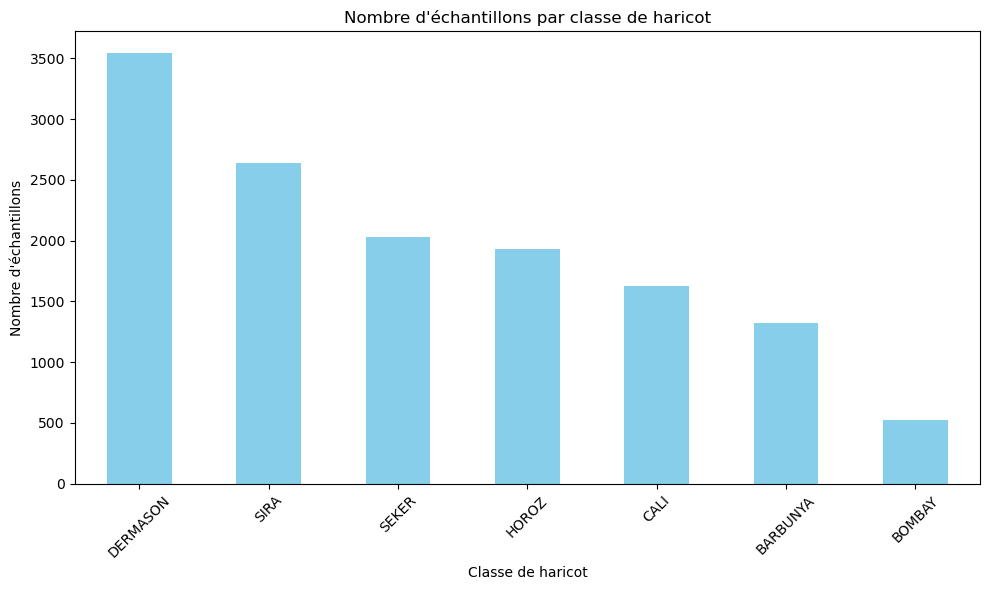

In [39]:
# Visualisation de la distribution des classes
print("\nDistribution des classes:")
class_counts = df['Class'].value_counts()
print(class_counts)

plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Nombre d\'échantillons par classe de haricot')
plt.xlabel('Classe de haricot')
plt.ylabel('Nombre d\'échantillons')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('distribution_classes.png')
plt.show()


Text(0, 0.5, 'Fréquence')

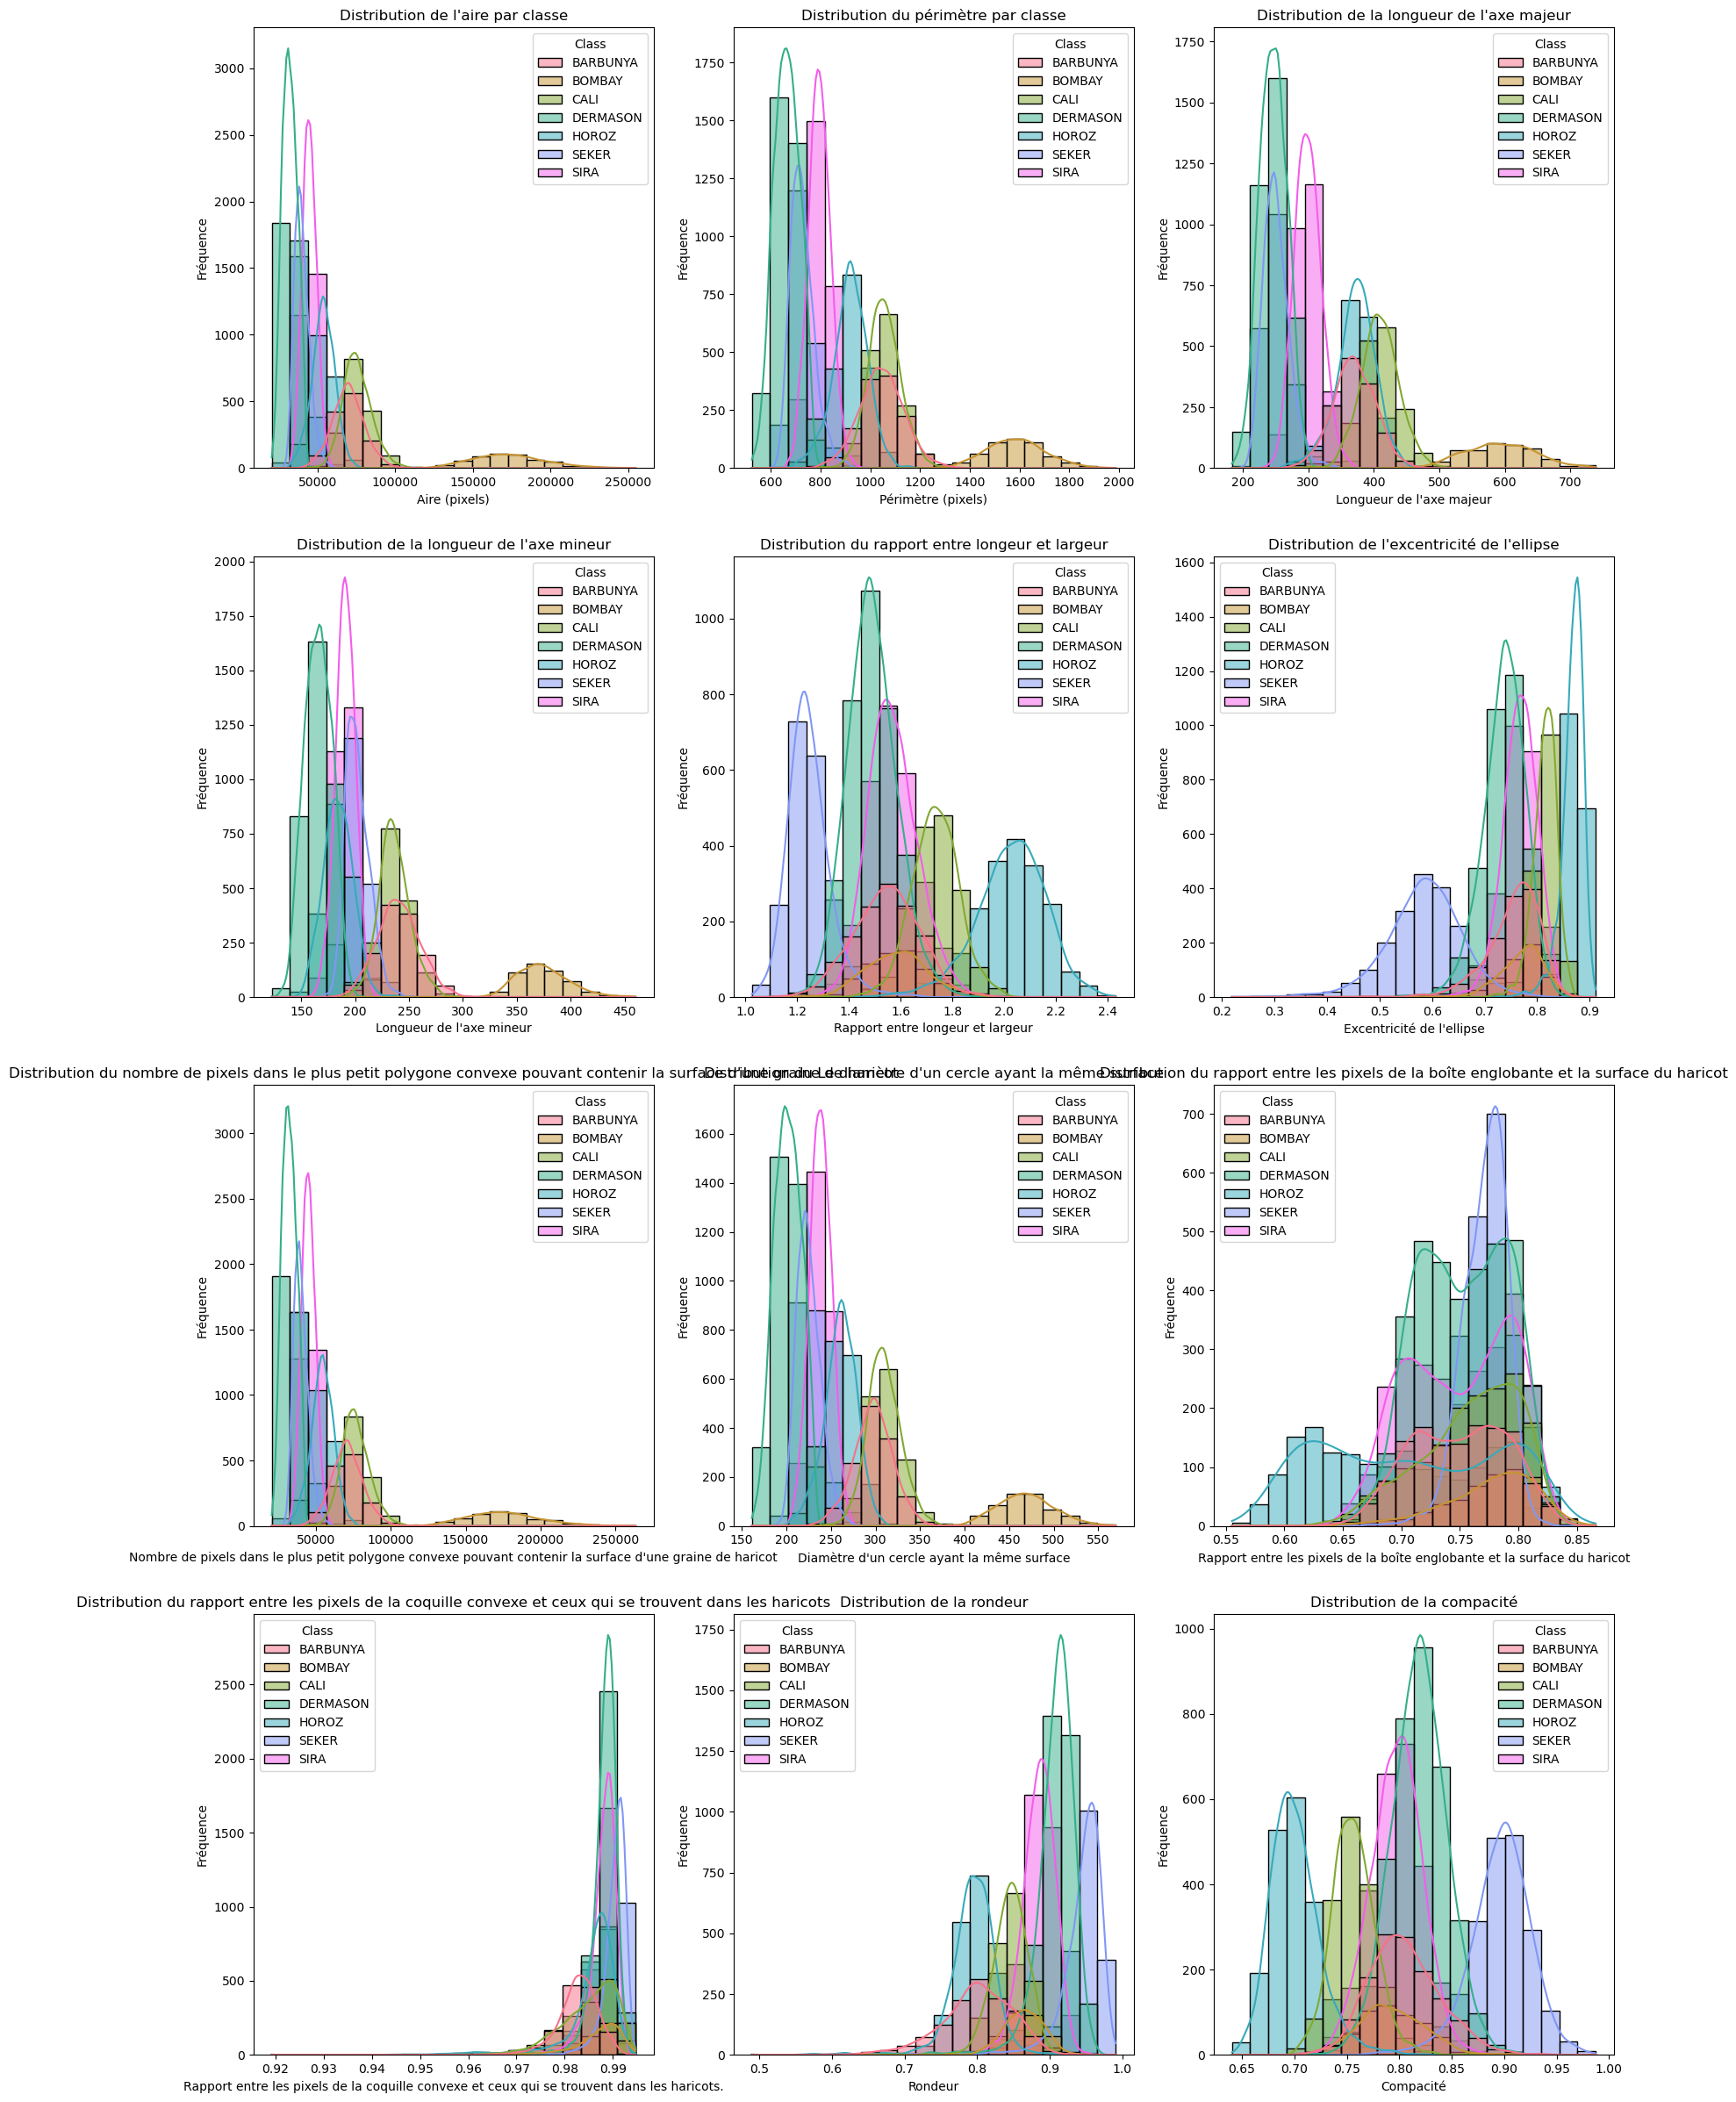

In [40]:
# Création d'une palette de couleurs pour différencier les classes
colors = sns.color_palette("husl", len(df['Class'].unique()))

# Histogrammes des principaux attributs
plt.figure(figsize=(20, 30))

# 1. Histogramme de l'aire (Area)
plt.subplot(4, 3, 1)
sns.histplot(data=df, x='Area', hue='Class', palette=colors, bins=20, kde=True)
plt.title('Distribution de l\'aire par classe', fontsize=12)
plt.xlabel('Aire (pixels)')
plt.ylabel('Fréquence')

# 2. Histogramme du périmètre (Perimeter)
plt.subplot(4, 3, 2)
sns.histplot(data=df, x='Perimeter', hue='Class', palette=colors, bins=20, kde=True)
plt.title('Distribution du périmètre par classe', fontsize=12)
plt.xlabel('Périmètre (pixels)')
plt.ylabel('Fréquence')

# 3. Histogramme de l'axe majeur (Major axis length)
plt.subplot(4, 3, 3)
sns.histplot(data=df, x='MajorAxisLength', hue='Class', palette=colors, bins=20, kde=True)
plt.title('Distribution de la longueur de l\'axe majeur', fontsize=12)
plt.xlabel('Longueur de l\'axe majeur')
plt.ylabel('Fréquence')

# 4. Histogramme de l'axe mineur (Minor axis length)
plt.subplot(4, 3, 4)
sns.histplot(data=df, x='MinorAxisLength', hue='Class', palette=colors, bins=20, kde=True)
plt.title('Distribution de la longueur de l\'axe mineur', fontsize=12)
plt.xlabel('Longueur de l\'axe mineur')
plt.ylabel('Fréquence')

# 5. Histogramme du rapport entre longeur et largeur (AspectRation)
plt.subplot(4, 3, 5)
sns.histplot(data=df, x='AspectRation', hue='Class', palette=colors, bins=20, kde=True)
plt.title('Distribution du rapport entre longeur et largeur', fontsize=12)
plt.xlabel('Rapport entre longeur et largeur')
plt.ylabel('Fréquence')

# 6. Histogramme de l'excentricité de l'ellipse ( Eccentricity)
plt.subplot(4, 3, 6)
sns.histplot(data=df, x='Eccentricity', hue='Class', palette=colors, bins=20, kde=True)
plt.title('Distribution de l\'excentricité de l\'ellipse', fontsize=12)
plt.xlabel('Excentricité de l\'ellipse')
plt.ylabel('Fréquence')

# 7. Histogramme du nombre de pixels dans le plus petit polygone convexe pouvant contenir la surface d'une graine de haricot (ConvexArea)
plt.subplot(4, 3, 7)
sns.histplot(data=df, x='ConvexArea', hue='Class', palette=colors, bins=20, kde=True)
plt.title('Distribution du nombre de pixels dans le plus petit polygone convexe pouvant contenir la surface d\'une graine de haricot', fontsize=12)
plt.xlabel('Nombre de pixels dans le plus petit polygone convexe pouvant contenir la surface d\'une graine de haricot')
plt.ylabel('Fréquence')

# 8. Histogramme du diamètre d'un cercle ayant la même surface (EquivDiameter)
plt.subplot(4, 3, 8)
sns.histplot(data=df, x='EquivDiameter', hue='Class', palette=colors, bins=20, kde=True)
plt.title('Distribution du Le diamètre d\'un cercle ayant la même surface', fontsize=12)
plt.xlabel('Diamètre d\'un cercle ayant la même surface')
plt.ylabel('Fréquence')

# 9. Histogramme de l'axe majeur (Extent)
plt.subplot(4, 3, 9)
sns.histplot(data=df, x='Extent', hue='Class', palette=colors, bins=20, kde=True)
#plt.title('Distribution du rapport entre les pixels de la boîte englobante et la surface du haricot', fontsize=12)
plt.xlabel('Rapport entre les pixels de la boîte englobante et la surface du haricot')
plt.ylabel('Fréquence')

# 10. Histogramme de l'axe majeur (Solidity)
plt.subplot(4, 3, 10)
sns.histplot(data=df, x='Solidity', hue='Class', palette=colors, bins=20, kde=True)
#plt.title('Distribution du rapport entre les pixels de la coquille convexe et ceux qui se trouvent dans les haricots', fontsize=12)
plt.xlabel('Rapport entre les pixels de la coquille convexe et ceux qui se trouvent dans les haricots.')
plt.ylabel('Fréquence')

# 11. Histogramme de l'axe majeur (roundness)
plt.subplot(4, 3, 11)
sns.histplot(data=df, x='roundness', hue='Class', palette=colors, bins=20, kde=True)
plt.title('Distribution de la rondeur', fontsize=12)
plt.xlabel('Rondeur')
plt.ylabel('Fréquence')

# 12. Histogramme de la compacité (Compactness)
plt.subplot(4, 3, 12)
sns.histplot(data=df, x='Compactness', hue='Class', palette=colors, bins=20, kde=True)
plt.title('Distribution de la compacité', fontsize=12)
plt.xlabel('Compacité')
plt.ylabel('Fréquence')


In [54]:
#conservation que des classes dermason et horoz 
df = df[df['Class'].isin(['DERMASON', 'HOROZ'])]
df['Class'] = df['Class'].cat.remove_unused_categories()
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,Class
5501,33006,710.496,283.020385,149.623719,1.891548,0.848829,33354,204.998889,0.635476,0.989566,0.821636,0.724326,HOROZ
5502,33263,719.325,271.339035,158.566112,1.711204,0.811477,34108,205.795449,0.672741,0.975226,0.807832,0.758444,HOROZ
5503,33407,706.222,281.535296,152.741906,1.843209,0.840035,33989,206.240426,0.809867,0.982877,0.841715,0.732556,HOROZ
5504,33518,702.956,277.571399,154.305581,1.798842,0.831240,34023,206.582775,0.808383,0.985157,0.852377,0.744251,HOROZ
5505,33518,702.956,277.571399,154.305581,1.798842,0.831240,34023,206.582775,0.808383,0.985157,0.852377,0.744251,HOROZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,DERMASON


# II. Analyse exploratoire

In [55]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness
count,5474.000000,5474.000000,5474.000000,5474.000000,5474.000000,5474.000000,5474.000000,5474.000000,5474.000000,5474.000000,5474.000000,5474.000000
mean,39701.730727,754.899976,290.940378,172.177798,1.679132,0.782705,40226.515893,222.480749,0.736554,0.987259,0.868070,0.777468
std,11786.335158,134.815665,64.975273,15.627779,0.279181,0.071495,11991.384531,32.439516,0.058318,0.004518,0.062188,0.061939
min,20420.000000,524.736000,183.601165,122.512653,1.188088,0.539964,20684.000000,161.243764,0.555315,0.943559,0.489618,0.640577
25%,30426.750000,648.760250,239.927540,160.725974,1.460814,0.728966,30787.250000,196.826170,0.704898,0.986461,0.808932,0.710477
50%,35857.500000,706.585000,263.021178,171.903986,1.557517,0.766665,36296.000000,213.670744,0.743059,0.988246,0.895691,0.800094
75%,49922.250000,888.397000,359.632422,182.735487,1.964630,0.860766,50663.750000,252.117002,0.783785,0.989582,0.917635,0.826152
max,81929.000000,1162.588000,456.758154,237.899946,2.430306,0.911423,83019.000000,322.978703,0.866195,0.993629,0.966603,0.915760



Distribution des classes:
DERMASON    3546
HOROZ       1928
Name: Class, dtype: int64


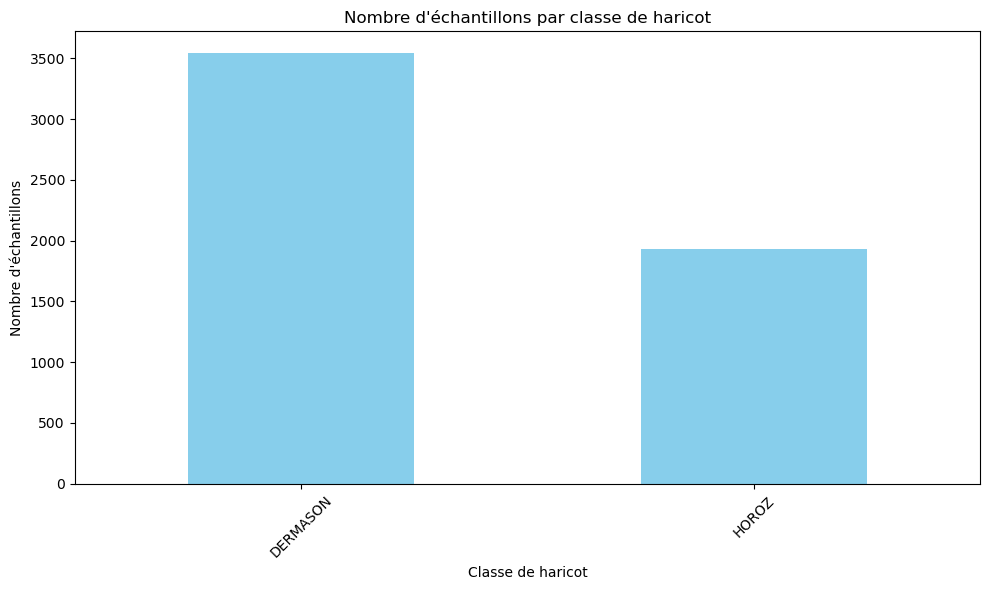

In [56]:
# Visualisation de la distribution des classes
print("\nDistribution des classes:")
class_counts = df['Class'].value_counts()
print(class_counts)

plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Nombre d\'échantillons par classe de haricot')
plt.xlabel('Classe de haricot')
plt.ylabel('Nombre d\'échantillons')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('distribution_classes.png')
plt.show()


Text(0, 0.5, 'Fréquence')

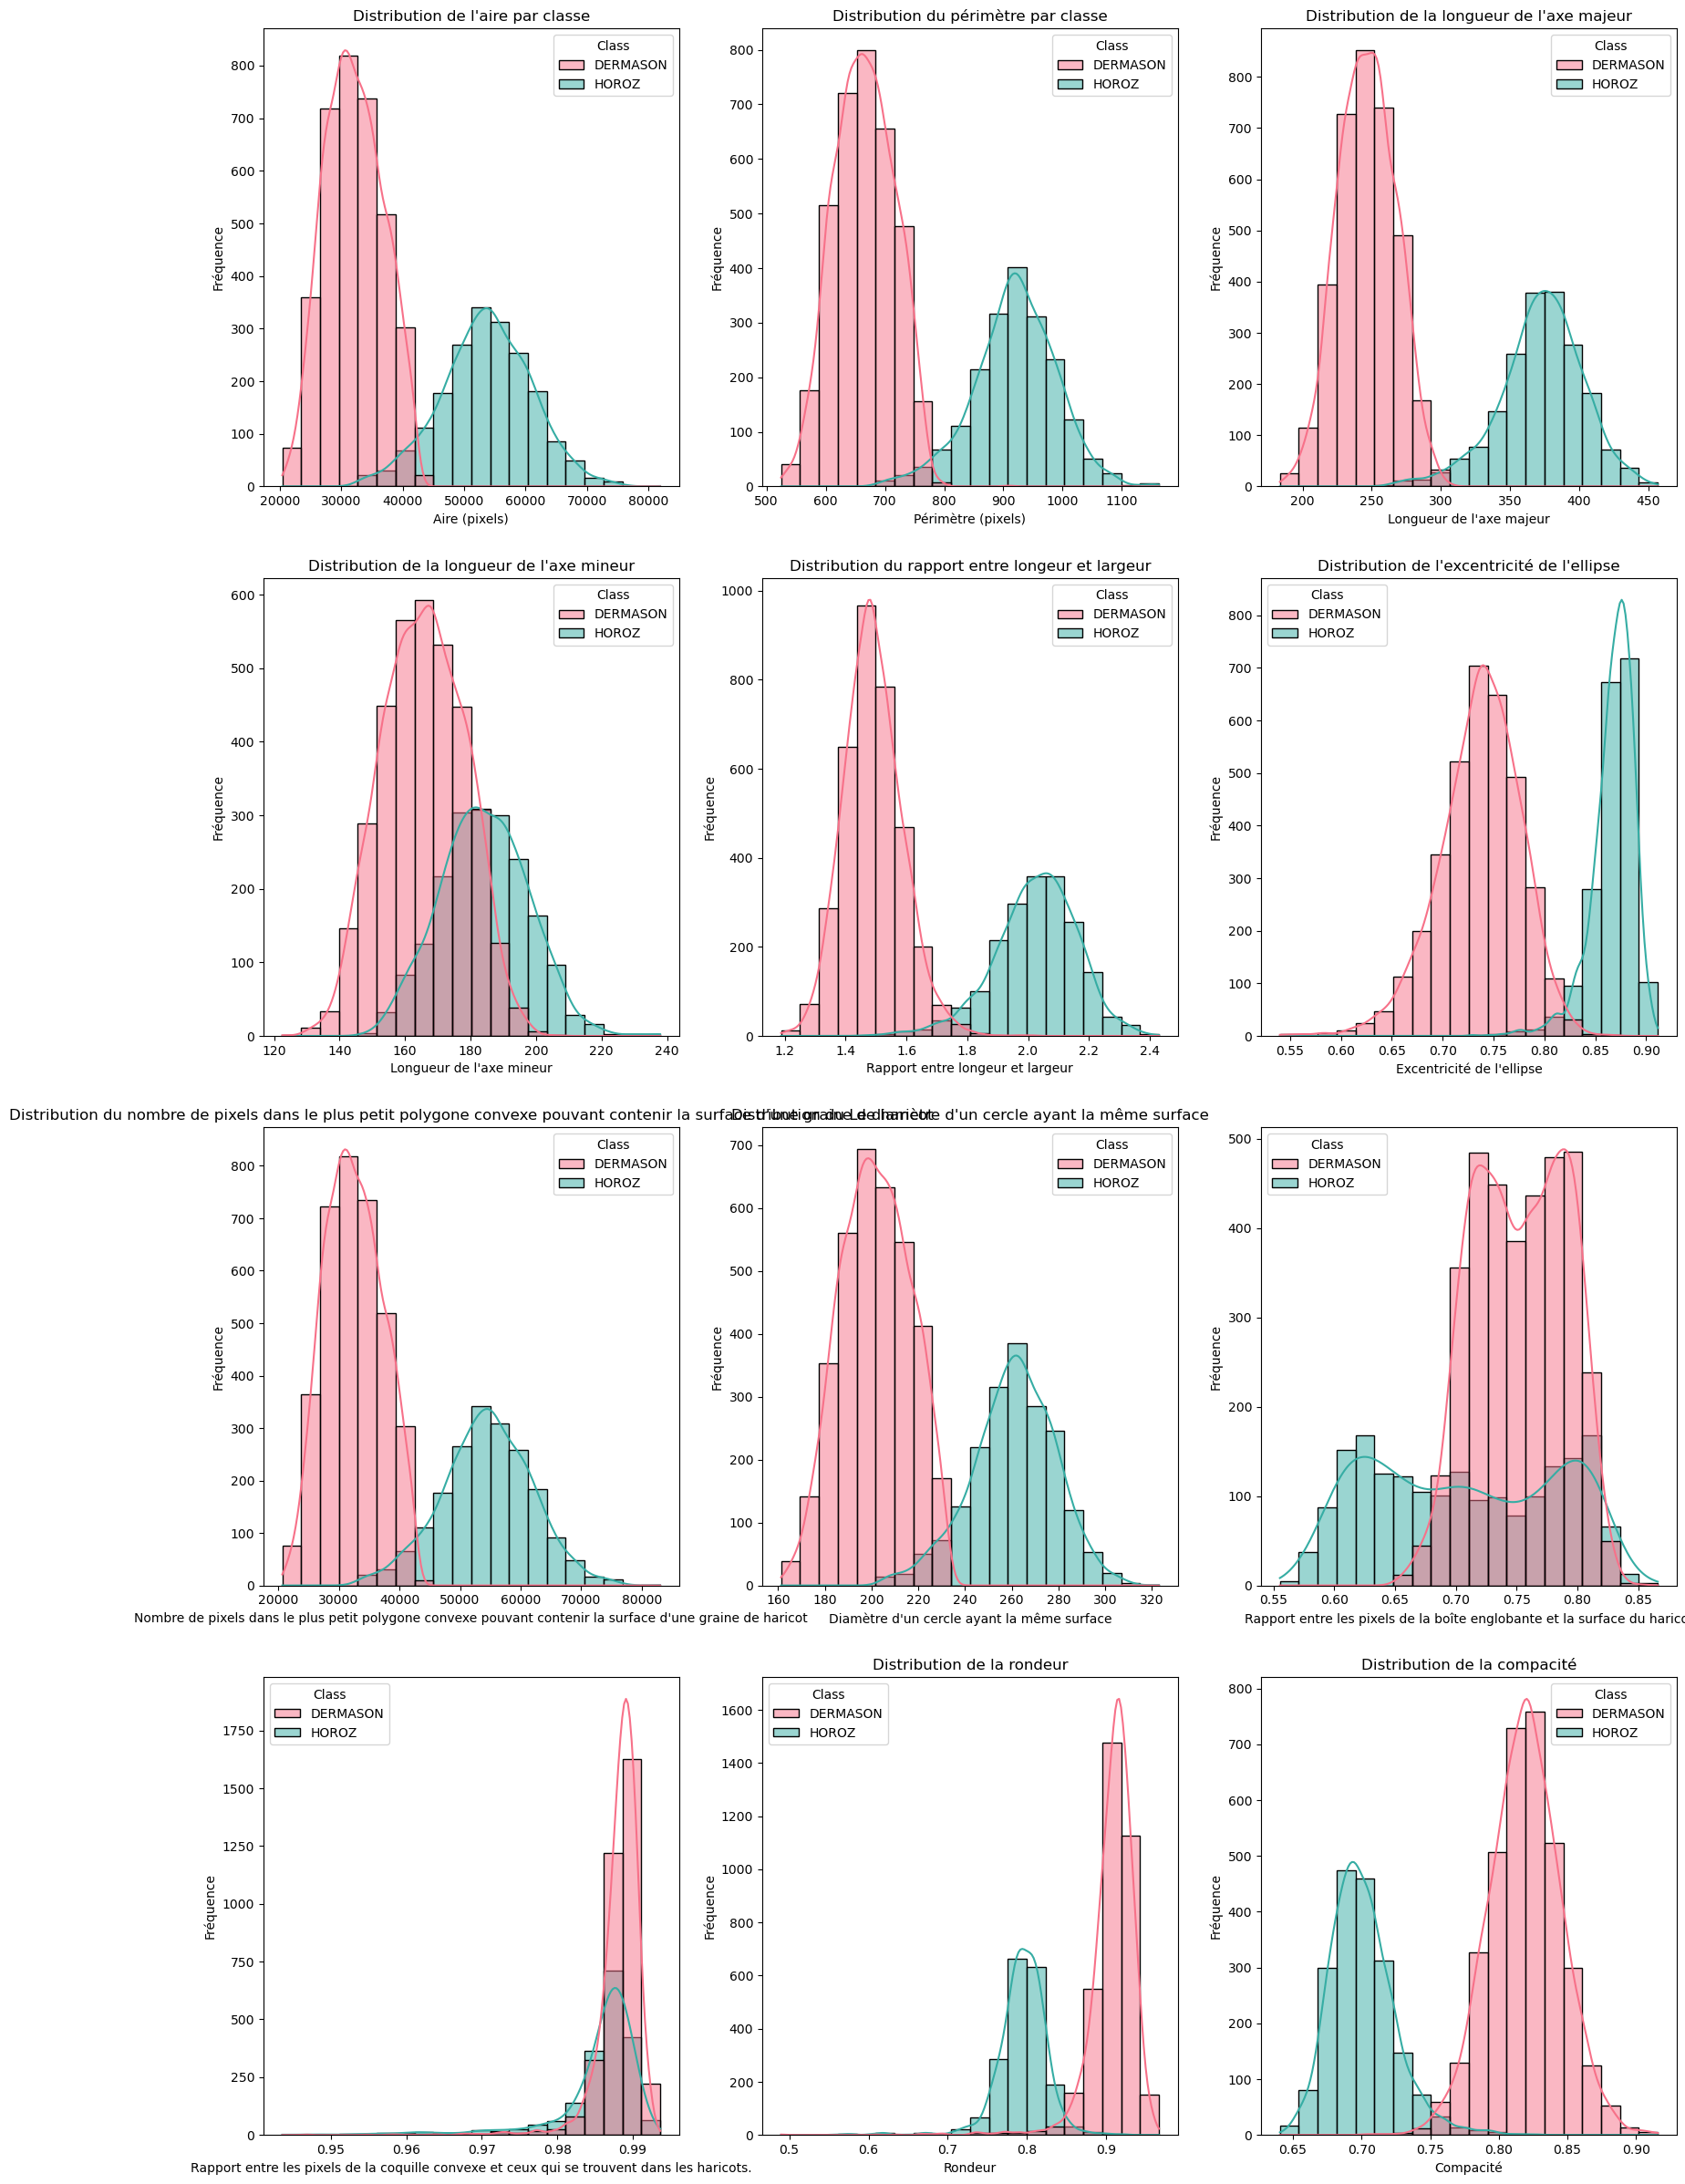

In [57]:
# Création d'une palette de couleurs pour différencier les classes
colors = sns.color_palette("husl", len(df['Class'].unique()))

# Histogrammes des principaux attributs
plt.figure(figsize=(20, 30))

# 1. Histogramme de l'aire (Area)
plt.subplot(4, 3, 1)
sns.histplot(data=df, x='Area', hue='Class', palette=colors, bins=20, kde=True)
plt.title('Distribution de l\'aire par classe', fontsize=12)
plt.xlabel('Aire (pixels)')
plt.ylabel('Fréquence')

# 2. Histogramme du périmètre (Perimeter)
plt.subplot(4, 3, 2)
sns.histplot(data=df, x='Perimeter', hue='Class', palette=colors, bins=20, kde=True)
plt.title('Distribution du périmètre par classe', fontsize=12)
plt.xlabel('Périmètre (pixels)')
plt.ylabel('Fréquence')

# 3. Histogramme de l'axe majeur (Major axis length)
plt.subplot(4, 3, 3)
sns.histplot(data=df, x='MajorAxisLength', hue='Class', palette=colors, bins=20, kde=True)
plt.title('Distribution de la longueur de l\'axe majeur', fontsize=12)
plt.xlabel('Longueur de l\'axe majeur')
plt.ylabel('Fréquence')

# 4. Histogramme de l'axe mineur (Minor axis length)
plt.subplot(4, 3, 4)
sns.histplot(data=df, x='MinorAxisLength', hue='Class', palette=colors, bins=20, kde=True)
plt.title('Distribution de la longueur de l\'axe mineur', fontsize=12)
plt.xlabel('Longueur de l\'axe mineur')
plt.ylabel('Fréquence')

# 5. Histogramme du rapport entre longeur et largeur (AspectRation)
plt.subplot(4, 3, 5)
sns.histplot(data=df, x='AspectRation', hue='Class', palette=colors, bins=20, kde=True)
plt.title('Distribution du rapport entre longeur et largeur', fontsize=12)
plt.xlabel('Rapport entre longeur et largeur')
plt.ylabel('Fréquence')

# 6. Histogramme de l'excentricité de l'ellipse ( Eccentricity)
plt.subplot(4, 3, 6)
sns.histplot(data=df, x='Eccentricity', hue='Class', palette=colors, bins=20, kde=True)
plt.title('Distribution de l\'excentricité de l\'ellipse', fontsize=12)
plt.xlabel('Excentricité de l\'ellipse')
plt.ylabel('Fréquence')

# 7. Histogramme du nombre de pixels dans le plus petit polygone convexe pouvant contenir la surface d'une graine de haricot (ConvexArea)
plt.subplot(4, 3, 7)
sns.histplot(data=df, x='ConvexArea', hue='Class', palette=colors, bins=20, kde=True)
plt.title('Distribution du nombre de pixels dans le plus petit polygone convexe pouvant contenir la surface d\'une graine de haricot', fontsize=12)
plt.xlabel('Nombre de pixels dans le plus petit polygone convexe pouvant contenir la surface d\'une graine de haricot')
plt.ylabel('Fréquence')

# 8. Histogramme du diamètre d'un cercle ayant la même surface (EquivDiameter)
plt.subplot(4, 3, 8)
sns.histplot(data=df, x='EquivDiameter', hue='Class', palette=colors, bins=20, kde=True)
plt.title('Distribution du Le diamètre d\'un cercle ayant la même surface', fontsize=12)
plt.xlabel('Diamètre d\'un cercle ayant la même surface')
plt.ylabel('Fréquence')

# 9. Histogramme de l'axe majeur (Extent)
plt.subplot(4, 3, 9)
sns.histplot(data=df, x='Extent', hue='Class', palette=colors, bins=20, kde=True)
#plt.title('Distribution du rapport entre les pixels de la boîte englobante et la surface du haricot', fontsize=12)
plt.xlabel('Rapport entre les pixels de la boîte englobante et la surface du haricot')
plt.ylabel('Fréquence')

# 10. Histogramme de l'axe majeur (Solidity)
plt.subplot(4, 3, 10)
sns.histplot(data=df, x='Solidity', hue='Class', palette=colors, bins=20, kde=True)
#plt.title('Distribution du rapport entre les pixels de la coquille convexe et ceux qui se trouvent dans les haricots', fontsize=12)
plt.xlabel('Rapport entre les pixels de la coquille convexe et ceux qui se trouvent dans les haricots.')
plt.ylabel('Fréquence')

# 11. Histogramme de l'axe majeur (roundness)
plt.subplot(4, 3, 11)
sns.histplot(data=df, x='roundness', hue='Class', palette=colors, bins=20, kde=True)
plt.title('Distribution de la rondeur', fontsize=12)
plt.xlabel('Rondeur')
plt.ylabel('Fréquence')

# 12. Histogramme de la compacité (Compactness)
plt.subplot(4, 3, 12)
sns.histplot(data=df, x='Compactness', hue='Class', palette=colors, bins=20, kde=True)
plt.title('Distribution de la compacité', fontsize=12)
plt.xlabel('Compacité')
plt.ylabel('Fréquence')


In [58]:
#matrice de corrélation
import plotly.express as px
correlation =  round(df.corr(numeric_only = True),  ndigits=2)

fig = px.imshow(correlation,
                text_auto=True,
                color_continuous_scale = 'Viridis',
                range_color=(0, 1),
                title='Correlation Matrix',
                width=800,
                height=800
            )

fig.update_xaxes(tickangle=40)

fig.show()

In [59]:
df=df.drop('ConvexArea',axis=1)
df=df.drop('Perimeter',axis=1)
df=df.drop('EquivDiameter',axis=1)
df=df.drop('AspectRation',axis=1)
df=df.drop('Compactness',axis=1)
df=df.drop('Area',axis=1)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5474 entries, 5501 to 13610
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   MajorAxisLength  5474 non-null   float64 
 1   MinorAxisLength  5474 non-null   float64 
 2   Eccentricity     5474 non-null   float64 
 3   Extent           5474 non-null   float64 
 4   Solidity         5474 non-null   float64 
 5   roundness        5474 non-null   float64 
 6   Class            5474 non-null   category
dtypes: category(1), float64(6)
memory usage: 304.8 KB


In [61]:
#matrice de corrélation
import plotly.express as px
correlation =  round(df.corr(numeric_only = True),  ndigits=2)

fig = px.imshow(correlation,
                text_auto=True,
                color_continuous_scale = 'Viridis',
                range_color=(0, 1),
                title='Correlation Matrix',
                width=800,
                height=800
            )

fig.update_xaxes(tickangle=40)

fig.show()

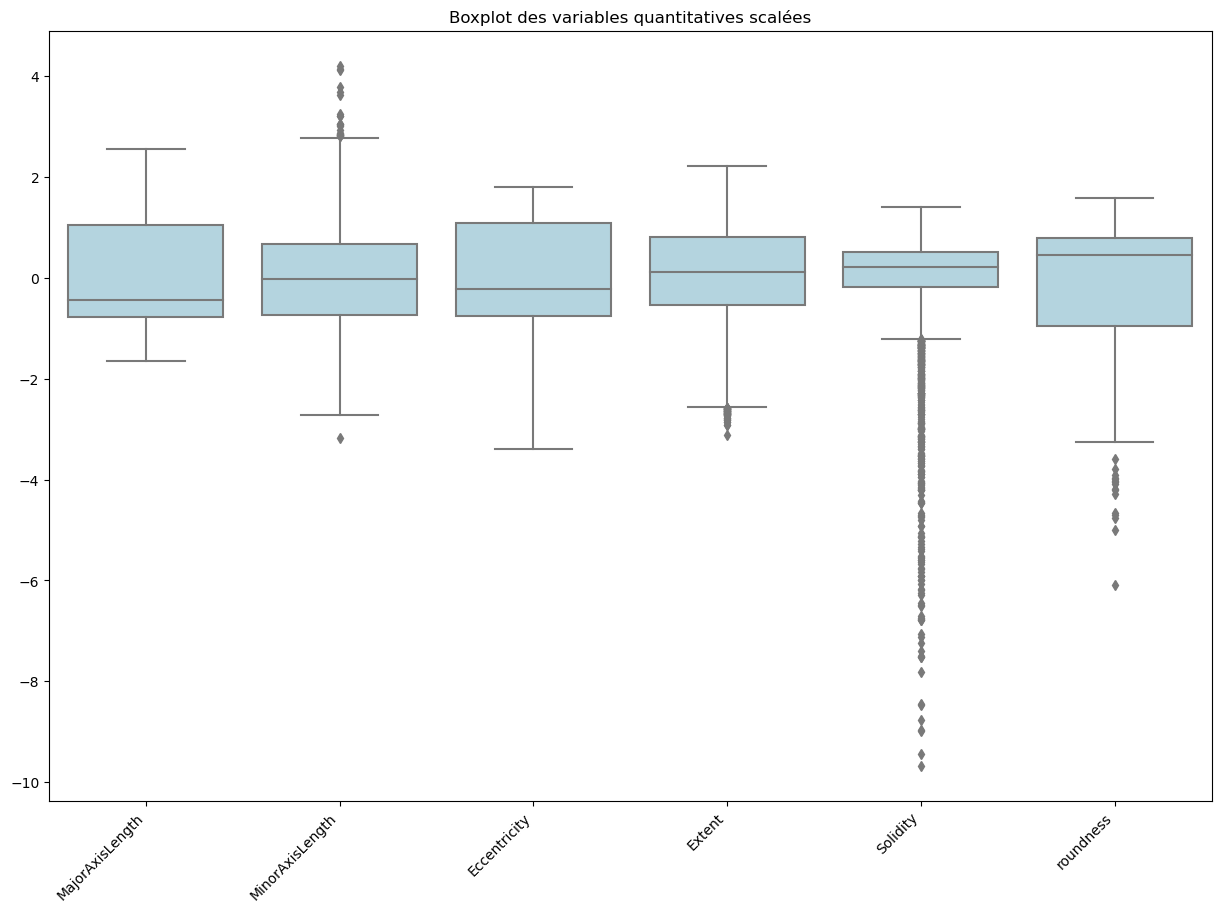

In [62]:
#Standardisation des données pour le graph
features_quanti=df.select_dtypes(exclude=["category"])
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(features_quanti), columns=features_quanti.columns)

# Créer un boxplot pour toutes les variables numériques
plt.figure(figsize=(15, 10))
sns.boxplot(data=data_scaled, color='lightblue')
plt.title('Boxplot des variables quantitatives scalées')

plt.xticks(rotation=45, ha="right")
# Afficher le graphique
plt.show()

In [47]:
import numpy as np
from scipy import stats

def grubbs_stat(y):
    std_dev = np.std(y)
    avg_y = np.mean(y)
    abs_val_minus_avg = abs(y - avg_y)
    max_of_deviations = max(abs_val_minus_avg)
    max_ind = np.argmax(abs_val_minus_avg)
    Gcal = max_of_deviations / std_dev
    return Gcal, max_ind

def calculate_critical_value(size, alpha):
    t_dist = stats.t.ppf(1 - alpha / (2 * size), size - 2)
    numerator = (size - 1) * np.sqrt(np.square(t_dist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(t_dist))
    critical_value = numerator / denominator
    return critical_value

def ESD_Test(input_series, alpha, max_outliers):
    input_series = np.array(input_series) #Transformation de la colonne en array
    
    # Vérification que la série n'est pas vide
    if len(input_series) <= 2:
        print("Nombre de valeurs atypiques : 0")
        print("Valeur atypique seuil : -")
        return 0, "-", 0, 0
    
    #Initialisation des valeurs
    nb_outliers = 0
    valeur_atypique_seuil = "-"
    last_Gstat = 0
    last_Gcritical = 0
    
    #Itération pour chaque valeur de la série
    for iterations in range(min(max_outliers, len(input_series) - 2)):
        if len(input_series) <= 2:
            break
            
        Gcritical = calculate_critical_value(len(input_series), alpha)
        Gstat, max_index = grubbs_stat(input_series)
        
        #Récupère les valeurs de la dernière itération où la valeur est considérée comme atypique
        if round(Gstat, 4) > round(Gcritical, 4):
            nb_outliers += 1
            valeur_atypique_seuil = input_series[max_index]
            last_Gstat = Gstat
            last_Gcritical = Gcritical
        
        #Supprime la valeur de l'itération pour tester sur d'autres
        input_series = np.delete(input_series, max_index)
    
    #Print des résultats du test
    print("Nombre de valeurs atypiques : " + str(nb_outliers))
    print("Valeur atypique seuil : {}".format(valeur_atypique_seuil))
    
    return nb_outliers, valeur_atypique_seuil, last_Gstat, last_Gcritical

# Appliquer le test ESD à chaque colonne de features_quanti
for column in features_quanti.columns:
    print(f"Test ESD pour la colonne : {column}")
    ESD_Test(features_quanti[column], alpha=0.05, max_outliers=100)
    print('-----------------------------------------------')

Test ESD pour la colonne : MajorAxisLength
Nombre de valeurs atypiques : 0
Valeur atypique seuil : -
-----------------------------------------------
Test ESD pour la colonne : MinorAxisLength
Nombre de valeurs atypiques : 0
Valeur atypique seuil : -
-----------------------------------------------
Test ESD pour la colonne : Eccentricity
Nombre de valeurs atypiques : 0
Valeur atypique seuil : -
-----------------------------------------------
Test ESD pour la colonne : Extent
Nombre de valeurs atypiques : 0
Valeur atypique seuil : -
-----------------------------------------------
Test ESD pour la colonne : Solidity
Nombre de valeurs atypiques : 100
Valeur atypique seuil : 0.971424119056431
-----------------------------------------------
Test ESD pour la colonne : roundness
Nombre de valeurs atypiques : 5
Valeur atypique seuil : 0.5778435944425948
-----------------------------------------------


In [48]:
# Statistiques descriptives pour Solidity par classe
solidity_stats = df.groupby('Class')['Solidity'].describe()
print("\nStatistiques descriptives pour Solidity par classe:")
print(solidity_stats)

# Statistiques descriptives pour roundness par classe
roundness_stats = df.groupby('Class')['roundness'].describe()
print("\nStatistiques descriptives pour roundness par classe:")
print(roundness_stats)



Statistiques descriptives pour Solidity par classe:
           count      mean       std       min       25%       50%       75%  \
Class                                                                          
DERMASON  3546.0  0.988226  0.002969  0.946634  0.987328  0.988717  0.989873   
HOROZ     1928.0  0.985480  0.006073  0.943559  0.984673  0.987018  0.988656   

               max  
Class               
DERMASON  0.993629  
HOROZ     0.992798  

Statistiques descriptives pour roundness par classe:
           count      mean       std       min       25%       50%       75%  \
Class                                                                          
DERMASON  3546.0  0.908114  0.029430  0.489618  0.897145  0.912320  0.924957   
HOROZ     1928.0  0.794420  0.031822  0.556766  0.780079  0.795961  0.812629   

               max  
Class               
DERMASON  0.966603  
HOROZ     0.921059  


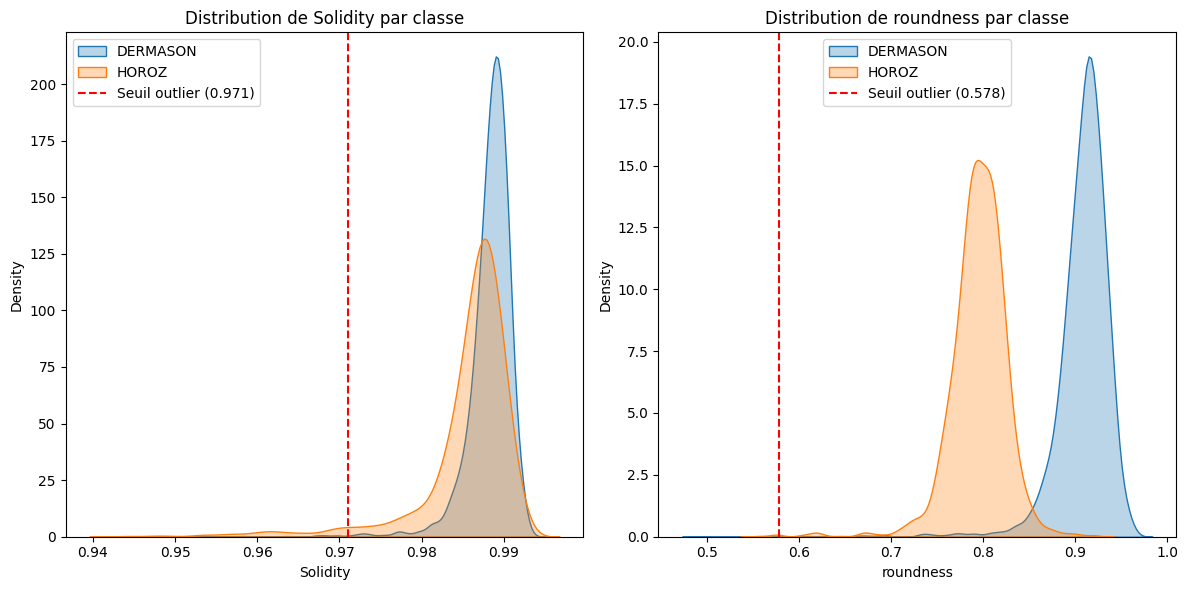

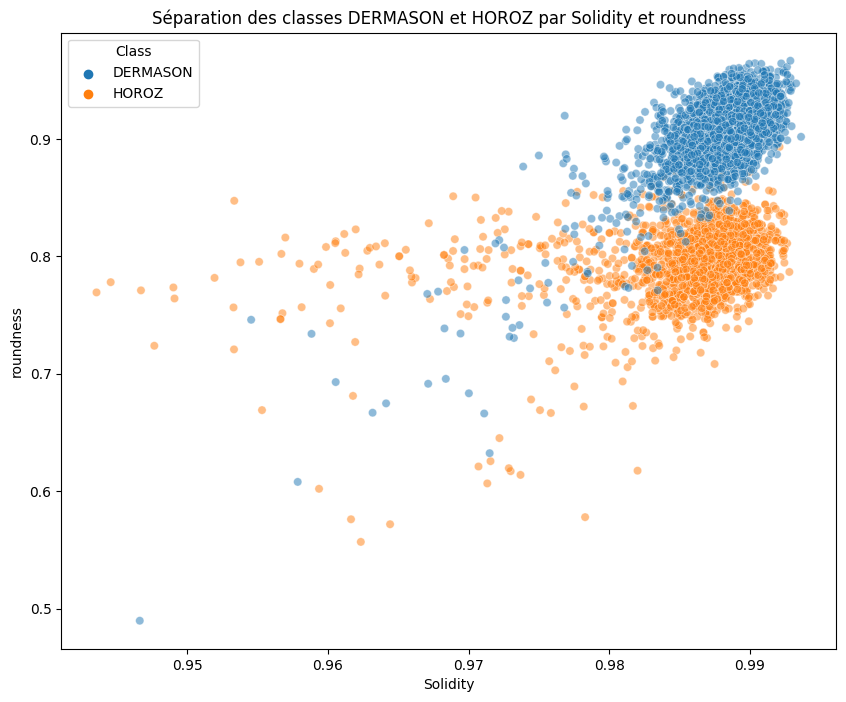

In [58]:
# Visualisation ciblée DERMASON vs HOROZ
plt.figure(figsize=(12, 6))

# Densité pour Solidity
plt.subplot(1, 2, 1)
sns.kdeplot(data=df[df['Class']=='DERMASON'], x='Solidity', label='DERMASON', fill=True, alpha=0.3)
sns.kdeplot(data=df[df['Class']=='HOROZ'], x='Solidity', label='HOROZ', fill=True, alpha=0.3)
plt.axvline(0.971, color='red', linestyle='--', label='Seuil outlier (0.971)')
plt.title('Distribution de Solidity par classe')
plt.legend()

# Densité pour roundness
plt.subplot(1, 2, 2)
sns.kdeplot(data=df[df['Class']=='DERMASON'], x='roundness', label='DERMASON', fill=True, alpha=0.3)
sns.kdeplot(data=df[df['Class']=='HOROZ'], x='roundness', label='HOROZ', fill=True, alpha=0.3)
plt.axvline(0.578, color='red', linestyle='--', label='Seuil outlier (0.578)')
plt.title('Distribution de roundness par classe')
plt.legend()

plt.tight_layout()
plt.show()

# Graphique de dispersion 2D pour voir la séparation des classes
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Solidity', y='roundness', hue='Class', alpha=0.5)
plt.title("Séparation des classes DERMASON et HOROZ par Solidity et roundness")
plt.show()

En analysant les distribution de ces variables nous confirmons notre choix de garder les deux variables malgré leur outliers, ces différences seront des éléments important pour différencier les classes d'haricot lors de la classification

In [63]:
# Resample
from sklearn.utils import resample

df_majority = df[df['Class']=='DERMASON']
df_minority = df[df['Class']=='HOROZ']

# Sous-échantillonnage
df_majority_downsampled = resample(
    df_majority, 
    replace=False,
    n_samples=len(df_minority),
    random_state=42
)

# Combinaison des datasets équilibrés
df_balanced = pd.concat([df_majority_downsampled, df_minority])
df_balanced['Class'].value_counts()

DERMASON    1928
HOROZ       1928
Name: Class, dtype: int64

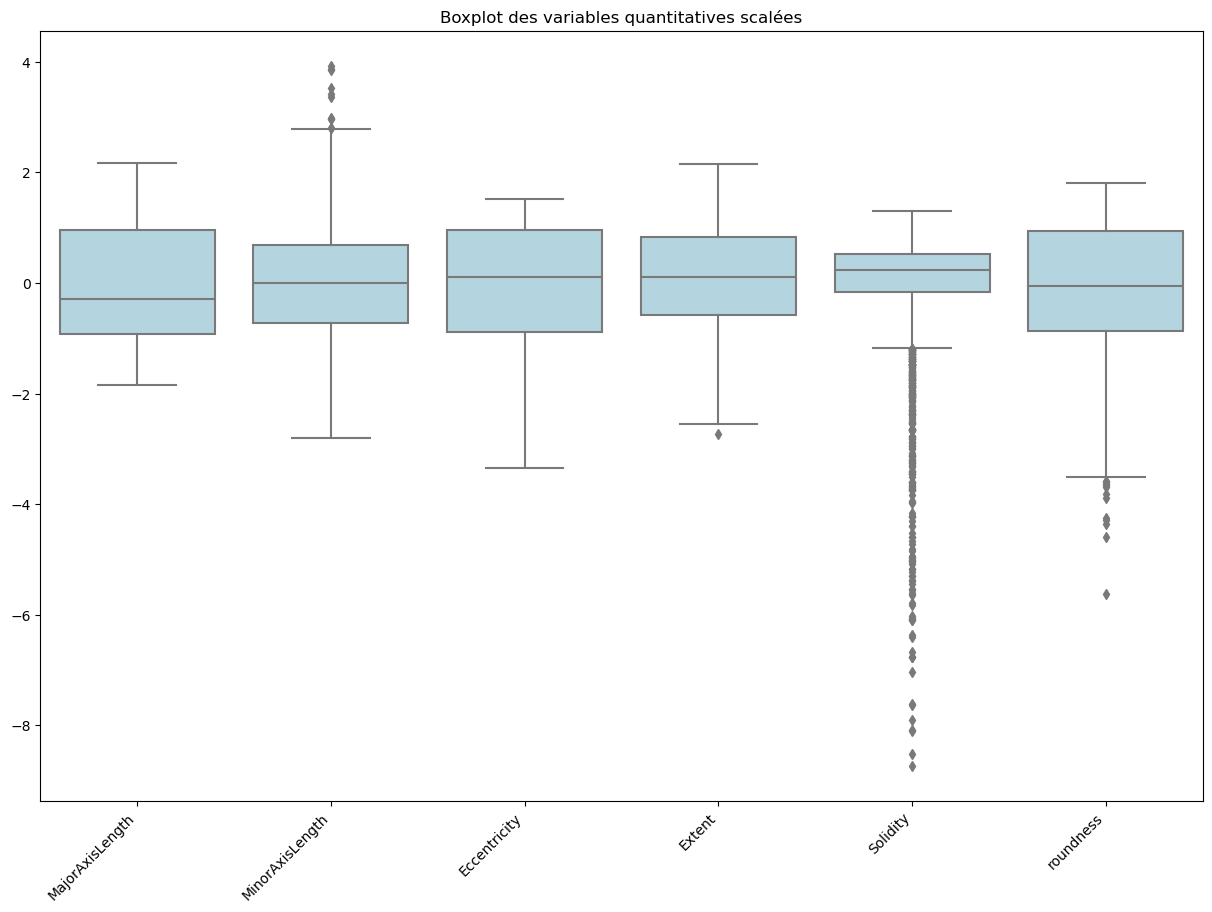

In [64]:
#Standardisation des données pour le graph
features_quanti=df_balanced.select_dtypes(exclude=["category"])
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(features_quanti), columns=features_quanti.columns)

# Créer un boxplot pour toutes les variables numériques
plt.figure(figsize=(15, 10))
sns.boxplot(data=data_scaled, color='lightblue')
plt.title('Boxplot des variables quantitatives scalées')

plt.xticks(rotation=45, ha="right")
# Afficher le graphique
plt.show()

In [65]:
# Appliquer le test ESD à chaque colonne de features_quanti
for column in features_quanti.columns:
    print(f"Test ESD pour la colonne : {column}")
    ESD_Test(features_quanti[column], alpha=0.05, max_outliers=100)
    print('-----------------------------------------------')

Test ESD pour la colonne : MajorAxisLength
Nombre de valeurs atypiques : 0
Valeur atypique seuil : -
-----------------------------------------------
Test ESD pour la colonne : MinorAxisLength
Nombre de valeurs atypiques : 0
Valeur atypique seuil : -
-----------------------------------------------
Test ESD pour la colonne : Eccentricity
Nombre de valeurs atypiques : 0
Valeur atypique seuil : -
-----------------------------------------------
Test ESD pour la colonne : Extent
Nombre de valeurs atypiques : 0
Valeur atypique seuil : -
-----------------------------------------------
Test ESD pour la colonne : Solidity
Nombre de valeurs atypiques : 100
Valeur atypique seuil : 0.9725706880725689
-----------------------------------------------
Test ESD pour la colonne : roundness
Nombre de valeurs atypiques : 3
Valeur atypique seuil : 0.5718009102658749
-----------------------------------------------


# II. Modélisation

In [66]:
# Séparation des données en variables explicatives et cible

X = df_balanced.iloc[:, :-1]
y = df_balanced['Class']

y

10364    DERMASON
12615    DERMASON
13144    DERMASON
12407    DERMASON
11276    DERMASON
           ...   
7424        HOROZ
7425        HOROZ
7426        HOROZ
7427        HOROZ
7428        HOROZ
Name: Class, Length: 3856, dtype: category
Categories (2, object): ['DERMASON', 'HOROZ']

In [67]:
from sklearn.preprocessing import LabelEncoder

# Création et application du LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Pour voir la correspondance des classes
print("Classes originales:", le.classes_)
print("Classes encodées:", list(range(len(le.classes_))))

Classes originales: ['DERMASON' 'HOROZ']
Classes encodées: [0, 1]


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, shuffle=True, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Distribution et proportions pour y_train
print("Distribution dans y_train:")
unique_train, counts_train = np.unique(y_train, return_counts=True)
for value, count in zip(unique_train, counts_train):
    proportion = count/len(y_train)
    print(f"Classe {value}: {count} ({proportion:.2%})")

# Distribution et proportions pour y_test
print("\nDistribution dans y_test:")
unique_test, counts_test = np.unique(y_test, return_counts=True)
for value, count in zip(unique_test, counts_test):
    proportion = count/len(y_test)
    print(f"Classe {value}: {count} ({proportion:.2%})")


Distribution dans y_train:
Classe 0: 1528 (49.55%)
Classe 1: 1556 (50.45%)

Distribution dans y_test:
Classe 0: 400 (51.81%)
Classe 1: 372 (48.19%)


In [69]:
#Standardisation des données
scaler = StandardScaler()
scaler.fit(X_train)

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)


In [70]:
# Modèles

#LinearSVC
l_svc= LinearSVC(random_state=42, max_iter=2000)
l_svc.fit(X_train_sc, y_train)

#SGDClassifier
sdg = SGDClassifier(loss='hinge' ,random_state=42)
sdg.fit(X_train_sc, y_train)

#SVM avec kernel linéaire
svc = SVC(kernel="linear", random_state=42)
svc.fit(X_train_sc, y_train)

#SVM avec noyau RBF
rbf_svc = SVC(kernel='rbf', random_state=42)
rbf_svc.fit(X_train_sc, y_train)

#SVM avec noyau poly
svc_poly = SVC(kernel='poly',random_state=0)
svc_poly.fit(X_train_sc, y_train)

#Regression logistique
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_sc, y_train)

#Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_sc, y_train)

#Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_sc, y_train)

#XGBoost
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_sc, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [71]:
#Métriques des modèles

def metriques(model, X, y, ech):
    # Prédiction 
    pred = model.predict(X).round()

    # Métriques
    conf_matrix = confusion_matrix(y, pred)
    accuracy = accuracy_score(y, pred)
    recall = recall_score(y, pred)
    precision = precision_score(y, pred)
    f1 = f1_score(y, pred)
    #mse = metrics.mean_squared_error(y, pred)

    # Résultats
    print(f"\033[1m{ech} :\033[0m")
    print(f"Matrice de confusion :\n{conf_matrix}")
    print(f"Accuracy : {round(accuracy, 2)}")
    print(f"Recall : {round(recall, 2)}")
    print(f"Precision : {round(precision, 2)}")
    print(f"F1 Score  : {round(f1, 2)}")
    #print(f"MSE : {round(mse, 2)}")

In [72]:
# Linear SVC
print("\n\nLinear SVC")
print("===================================")
metriques(l_svc, X_train_sc, y_train, "train")
metriques(l_svc, X_test_sc, y_test, "test")

# SGD Classifier
print("\n\nSGD Classifier")
print("===================================")
metriques(sdg, X_train_sc, y_train, "train")
metriques(sdg, X_test_sc, y_test, "test")

# SVC avec kernel linéaire
print("\n\nSVC avec kernel linéaire")
print("===================================")
metriques(svc, X_train_sc, y_train, "train")
metriques(svc, X_test_sc, y_test, "test")

# SVC avec noyau RBF
print("\n\nSVC avec noyau RBF")
print("===================================")
metriques(rbf_svc, X_train_sc, y_train, "train")
metriques(rbf_svc, X_test_sc, y_test, "test")

# SVC avec noyau polynomial
print("\n\nSVC avec noyau polynomial")
print("===================================")
metriques(svc_poly, X_train_sc, y_train, "train")
metriques(svc_poly, X_test_sc, y_test, "test")

#Logistic Regression
print("\n\nLogistic Regression")
print("===================================")
metriques(log_reg, X_train_sc, y_train, "train")
metriques(log_reg, X_test_sc, y_test, "test")


# Random Forest
print("\n\nRandom Forest")
print("===================================")
metriques(rf, X_train_sc, y_train, "train")
metriques(rf, X_test_sc, y_test, "test")

# Gradient Boosting
print("\n\nGradient Boosting")
print("===================================")
metriques(gb, X_train_sc, y_train, "train")
metriques(gb, X_test_sc, y_test, "test")

# XGBoost
print("\n\nXGBoost")
print("===================================")
metriques(xgb, X_train_sc, y_train, "train")
metriques(xgb, X_test_sc, y_test, "test")





Linear SVC
train :
Matrice de confusion :
[[1520    8]
 [  18 1538]]
Accuracy : 0.99
Recall : 0.99
Precision : 0.99
F1 Score  : 0.99
test :
Matrice de confusion :
[[400   0]
 [  6 366]]
Accuracy : 0.99
Recall : 0.98
Precision : 1.0
F1 Score  : 0.99


SGD Classifier
train :
Matrice de confusion :
[[1520    8]
 [  21 1535]]
Accuracy : 0.99
Recall : 0.99
Precision : 0.99
F1 Score  : 0.99
test :
Matrice de confusion :
[[400   0]
 [  6 366]]
Accuracy : 0.99
Recall : 0.98
Precision : 1.0
F1 Score  : 0.99


SVC avec kernel linéaire
train :
Matrice de confusion :
[[1521    7]
 [  18 1538]]
Accuracy : 0.99
Recall : 0.99
Precision : 1.0
F1 Score  : 0.99
test :
Matrice de confusion :
[[400   0]
 [  6 366]]
Accuracy : 0.99
Recall : 0.98
Precision : 1.0
F1 Score  : 0.99


SVC avec noyau RBF
train :
Matrice de confusion :
[[1524    4]
 [  14 1542]]
Accuracy : 0.99
Recall : 0.99
Precision : 1.0
F1 Score  : 0.99
test :
Matrice de confusion :
[[399   1]
 [  5 367]]
Accuracy : 0.99
Recall : 0.99
Preci

In [73]:
#Cross validation
from sklearn.model_selection import cross_val_score

#LinearSVC
cvs_l_svc= cross_val_score(l_svc, X_train_sc, y_train, cv=5,scoring='accuracy')

#SGDClassifier
cvs_sdg = cross_val_score(sdg, X_train_sc, y_train, cv=5,scoring='accuracy')

#SVM avec kernel linéaire
cvs_svc = cross_val_score(svc, X_train_sc, y_train, cv=5,scoring='accuracy')

#SVM avec noyau RBF
cvs_rbf_svc = cross_val_score(rbf_svc, X_train_sc, y_train, cv=5,scoring='accuracy')

#SVM avec noyau poly
cvs_svc_poly = cross_val_score(svc_poly, X_train_sc, y_train, cv=5,scoring='accuracy')

#Regression logistique
cvs_log_reg = cross_val_score(log_reg, X_train_sc, y_train, cv=5,scoring='accuracy')

#Random Forest
cvs_rf = cross_val_score(rf, X_train_sc, y_train, cv=5,scoring='accuracy')

#Gradient Boosting
cvs_gb = cross_val_score(gb, X_train_sc, y_train, cv=5,scoring='accuracy')

#XGBoost
cvs_xgb = cross_val_score(xgb, X_train_sc, y_train, cv=5,scoring='accuracy')

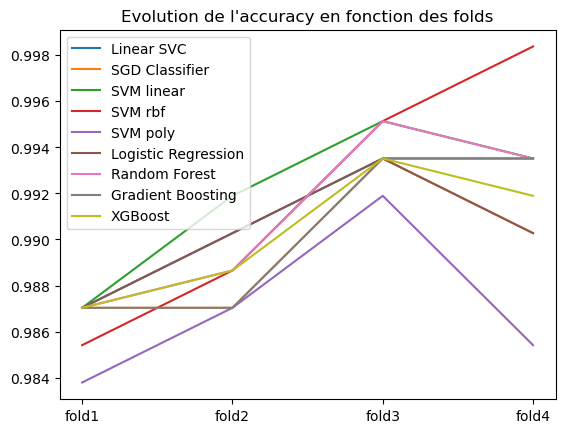

In [74]:
df_cross = pd.DataFrame(np.transpose(np.c_[cvs_l_svc, cvs_sdg, cvs_svc, cvs_rbf_svc, cvs_svc_poly, cvs_log_reg, cvs_rf, cvs_gb, cvs_xgb]),   
                        columns=['fold1','fold2','fold3','fold4','fold5'])
#Adding model label
df_cross['model'] = ['Linear SVC','SGD Classifier','SVM linear','SVM rbf','SVM poly','Logistic Regression','Random Forest','Gradient Boosting','XGBoost']

for row in range(df_cross.shape[0]):
    plt.plot( df_cross.iloc[row,0:4] ,label=''+str(df_cross.iloc[row,5]))

plt.legend()
plt.title("Evolution de l'accuracy en fonction des folds")
plt.show()

Au vu des folds, 3 fold semblent suffisant

In [75]:
#Optimisation des modèles choisis

In [76]:
# Random Forest

rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [127]:
param_dist = {
    'n_estimators': [100, 200, 500],  # Plus d'arbres
    'max_depth': [3, 4, 5, 6, None],  # Profondeur maximale
    'min_samples_split': [2, 5, 10,15],  # Taille min de split
    'min_samples_leaf': [1,2,4],  # Taille min des feuilles
    'max_features' : ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy', 'log_loss']
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50, 
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1   ,
    verbose=2,
    random_state=42
)

In [128]:
random_search.fit(X_train_sc, y_train)
print("Meilleurs paramètres (RandomizedSearch) :", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Meilleurs paramètres (RandomizedSearch) : {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 4, 'criterion': 'gini'}


In [129]:
# Trier les résultats du meilleur au pire
# Récupérer tous les résultats
results_df = pd.DataFrame(random_search.cv_results_)
results_df = results_df.sort_values(by="rank_test_score")

# Afficher les meilleurs essais
results_df[['rank_test_score','mean_test_score', 'std_test_score', 'params']].head(10)


,rank_test_score,mean_test_score,std_test_score,params
0,1,-0.007781,0.003141,"{'n_estimators': 100, 'min_samples_split': 5, ..."
44,1,-0.007781,0.003141,"{'n_estimators': 100, 'min_samples_split': 5, ..."
43,1,-0.007781,0.003141,"{'n_estimators': 100, 'min_samples_split': 5, ..."
40,1,-0.007781,0.003141,"{'n_estimators': 100, 'min_samples_split': 10,..."
39,1,-0.007781,0.003141,"{'n_estimators': 100, 'min_samples_split': 10,..."
37,1,-0.007781,0.003141,"{'n_estimators': 100, 'min_samples_split': 5, ..."
35,1,-0.007781,0.003141,"{'n_estimators': 200, 'min_samples_split': 5, ..."
30,1,-0.007781,0.003141,"{'n_estimators': 100, 'min_samples_split': 10,..."
22,1,-0.007781,0.003141,"{'n_estimators': 100, 'min_samples_split': 2, ..."
21,1,-0.007781,0.003141,"{'n_estimators': 200, 'min_samples_split': 5, ..."


In [77]:
# Modèle Random Forest
best_model = RandomForestClassifier(n_estimators = 100, min_samples_split = 5, min_samples_leaf = 4, max_features = 'sqrt', max_depth = 4, criterion = 'gini')
best_model.fit(X_train_sc, y_train)

y_pred_rf_test = best_model.predict(X_test_sc)
y_pred_rf_train = best_model.predict(X_train_sc)

metriques(best_model, X_train_sc, y_pred_rf_train, "train")
metriques(best_model, X_test_sc, y_pred_rf_test, "test")

train :
Matrice de confusion :
[[1540    0]
 [   0 1544]]
Accuracy : 1.0
Recall : 1.0
Precision : 1.0
F1 Score  : 1.0
test :
Matrice de confusion :
[[405   0]
 [  0 367]]
Accuracy : 1.0
Recall : 1.0
Precision : 1.0
F1 Score  : 1.0


In [78]:
feature_importance_df = pd.DataFrame({
    'Feature': features_quanti.columns,  # Utiliser les noms de colonnes
    'Importance': best_model.feature_importances_
})

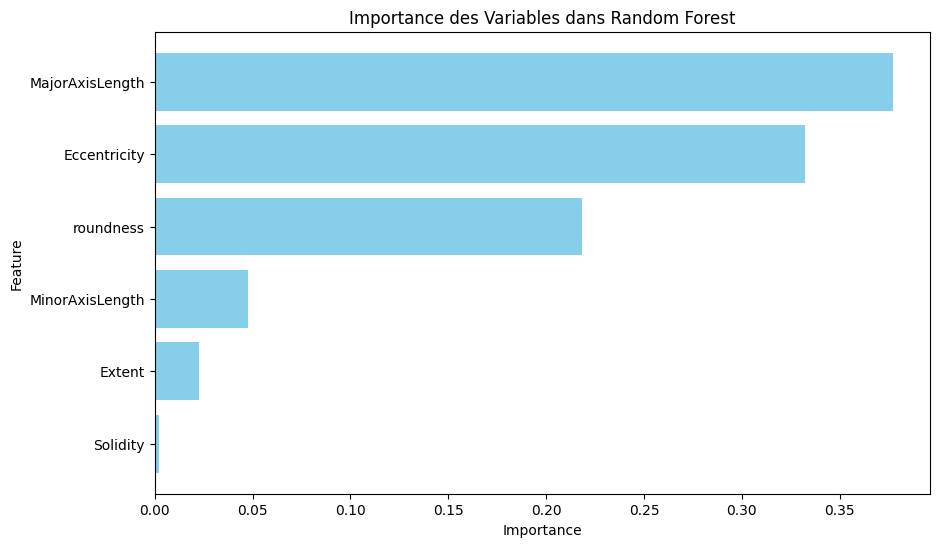

In [142]:
# Plot de l'importance des features

order_importance = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(order_importance['Feature'], order_importance['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Importance des Variables dans Random Forest")
plt.gca().invert_yaxis()  # Inverser pour que la plus importante soit en haut
plt.show()

In [147]:
df_interpret = pd.DataFrame(X_test_sc, columns = features_quanti.columns)

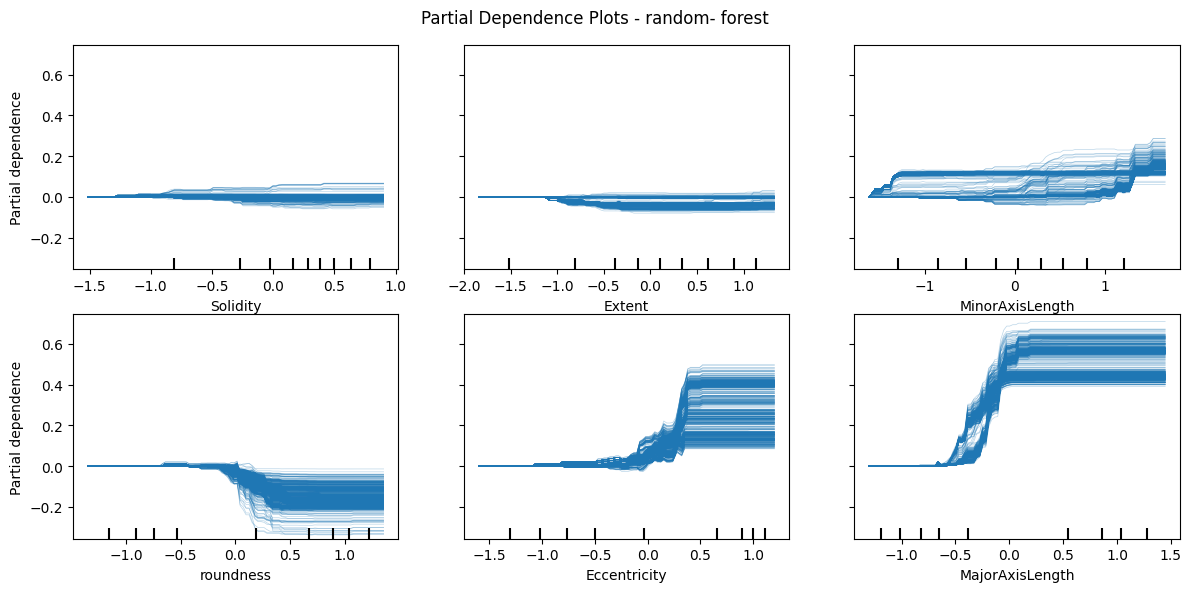

In [153]:
# PDP pour plusieurs caractéristiques (par exemple, 'sepal length' et 'petal width')
features = ["Solidity","Extent","MinorAxisLength","roundness","Eccentricity","MajorAxisLength"]  # Index des caractéristiques # Index des caractéristiques
_, ax1 = plt.subplots(figsize = (12,6))
PartialDependenceDisplay.from_estimator(best_model,  #votre modèle
                                         df_interpret, 
                                         features,
                                         kind="individual",
                                         ax = ax1,
                                         n_cols=3,
                                         centered=True
                                         )
plt.suptitle("Partial Dependence Plots - random- forest")
plt.tight_layout()
plt.show()

In [150]:
# Calculer le PDP sur les données standardisées

def display_original_pdp_values(num_col, model, df,scaler) :
    """_summary_

      Display origina pdp values permet d'afficher les données originales des PDP après un scaling features


    Args:
        num_col (_type_): Numéro de l'index de la colonne à afficher
        model (_type_): Modèle utilisé
        df (_type_): DataFrame avec vos données
        scaler (_type_): Scaler utilisé, uniquement sklearn
    """
    features_to_plot = [(num_col,)]  # Indices des colonnes à analyser

    pdp_results = partial_dependence(model, df, features=features_to_plot, kind='average')

    # Extraire les valeurs PDP (standardisées)
    grid = pdp_results['grid_values']  # Grille de valeurs pour chaque feature
    pdp = pdp_results['average']  # Valeurs moyennes du PDP

    # Appliquer l'inverse transformation sur la grille de valeurs
    original_grid = [scaler.mean_[num_col] + grid[0] * scaler.scale_[num_col]]

    
    plt.plot(original_grid[0],pdp[0])
    plt.xlabel('Variable : {}'.format(df.columns[3]))
    plt.ylabel('Partian depence plot value')
    plt.title('Original Partial depence plot ')


    
    return()

()

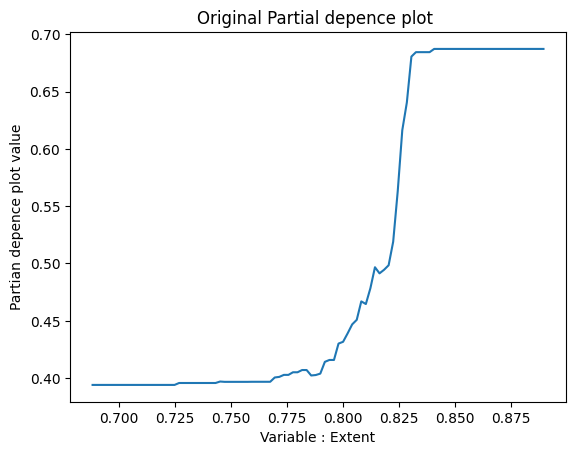

In [152]:
display_original_pdp_values(2, best_model, df_interpret, scaler)